############### BCB 546X: Python Assignment Details - Sean McLaughlin #################

** Your Mission: Complete Python code in a Jupyter Notebook ** #

- Functions --#<br>
 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.<br>
 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.<br>
 3. Write an alternative translation function.<br>
 4. Write a function that calculates the molecular weight of each amino acid sequence.<br>
 5. Write a function that computes the GC-content of each DNA sequence.

- In the MAIN part of the script --#<br>
 6. Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.<br>
 7. Call your functions from step 3 (or step 2) and step 4 and 5 and fill in the new columns in the DataFrame.<br>
 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: <br>
     a. What is the largest bear species? <br>
     b. What else is interesting about this species?<br>
 9. Plot a graph that shows the molecular weight as a function of GC content. <br>
 10. Write the entire DataFrame to a new CSV file that includes your new columns.<br>
 11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

- Additional Instructions (points will be deducted if these instructions are not heeded) --#<br>
 ** Do all of this in a Jupyter notebook and push it to a GitHub repository.<br>
 ** Your repository should not contain any files other than those associated with this assignment. <br>
 ** Read all comments carefully and answer the questions by including information in your Jupyter notebook.<br>
 ** Document all of your code (and Dr. X's code) very thoroughly so that it is clear what you did.<br>
 ** Be sure to cite (by providing URLs or other relevant citations) information appropriately in your documented notebook.<br>
 ** Commit and push your completed work in the Jupyter notebook to your repository.<br>
 ** Submit the URL to your git repository via Canvas by the end of the day on May 5, 2021.

- Disclaimer --#<br>
 Not all of these tasks have been covered in class and you will have to use online resources to find out how to do some of these tasks.

###################### Python Translate Script ########################

 Here's the start of our Python script. Thanks for completing it for me! - Dr. X<br>
 IMPORTANT: install BioPython so that this will work

In [42]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [43]:
import seaborn as sns
import requests
import urllib
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
from Bio.SeqUtils import molecular_weight
import numpy as np
import matplotlib.pyplot as plt
import argparse
#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

 1 ##<br>
 Dr. X: this gets sequences <br>
 Please finish documenting this function with comments, or in notebook markdown text<br>
 Your descriptions of all functions should contain information about what the function does,<br>
 as well as information about the return types and arguments.

In [44]:
def get_sequences_from_file(fasta_fn):# def command is used to define get_sequences_from_file as the function name and the fasta_fn is tested
    # The : includes the information below the line in the function
    sequence_data_dict = {}# Creating a base directory for sequences 
    for record in SeqIO.parse(fasta_fn, "fasta"):# for command creates a loop for the code and reads sequences as with the SeqIO.parse function and specification of "fasta" product is SeqRecord objects #Source -> "https://biopython.org/wiki/SeqIO"
        description = record.description.split() # Defining record.description.split()
        species_name = description[1] + " " + description[2]# Adding descriptions together into species_name 
        sequence_data_dict[species_name] = record.seq # Put species name into a dictonary which is called record.seq
    return(sequence_data_dict)

 Import Datafiles ##

In [45]:
cytb_sequences = get_sequences_from_file("bears_cytb.fasta") # Getting sequences
bears_df = pd.read_csv('bears_mass.csv')  # Includes only data for body mass 
spec_list = list(bears_df.species) # Putting species into a list

 2 ##<br>
##### YOUR STRING-TRANSLATE FUNCTION ########

In [46]:
def translate_function(sequence):
    # function takes sequence into amino acid data and leaves stop codons
    gencode = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  # creates codon table 
    protein = ''
    for i in range(0,len(sequence),3): # looping through every 3rd position
        codon = sequence[i:i+3]
        if codon in gencode.stop_codons: # Make so doesn't translate stop codons
            pass
        else :
            protein = protein + gencode.forward_table[codon]   # add amino acids 
    return protein
## Write a function that translates sequences

 3 ##<br>
##### YOUR ALTERNATIVE FUNCTION ########

In [47]:
def translate_dna(sequence):
    #function takes sequence into amino acid data and leaves stop codons 
    dna_seq = Seq(sequence)
    protein_seq = dna_seq.translate(table = 2, to_stop = True)
    return protein_seq
    #Source -> "biopython.org/wiki/Seq"
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [48]:
def computed_molecular_weight(sequence):
    #function calculates molecular weight
    aa_seq = ProteinAnalysis(sequence)
    mole_weight = aa_seq.molecular_weight()
    return(mole_weight)
    #Source -> "http://biopython.org/wiki/ProtParam"

 5 ##<br>
##### YOUR GC CONTENT ANALYSIS FUNCTION ########

In [49]:
def gc_content(sequence):
    #function calculates GC-content in DNA sequence
    nbases = sequence.count('n')+sequence.count('N') # Count 'N' or 'n'
    gc_percent = float(sequence.count('C')+sequence.count('G'))*100.0/(len(sequence)-nbases) # remove N or n from GC
    return gc_percent

%%%%%%%%%%%%%#<br>
#   MAIN   ###<br>
%%%%%%%%%%%%%#<br>
 Import Files ##

In [50]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

 6 ## 

In [51]:
bears_df = pd.read_csv("bears_mass.csv") 

In [52]:
bears_df['molecular_weight'] = 'NaN' # add molecular_weight columm and assign NaN to column 
bears_df['GC'] = 'NaN' # add GC to columm and assign NaN to column 
bears_df # To see output and structure of dataframe and if columns added correctly

,species,mass,molecular_weight,GC
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


 7 ##

In [53]:
index = 0 # Sets Index at 0 value for loop
for key,value in cytb_seqs.items():#for loop with every key, in value used to set cytb_seqs as a dictionary with cytb_seqs.items
    aa_sequence = translate_function(str(value)) #Translate DNA nucleotides into aminio acids
    molecular_weight_cal = computed_molecular_weight(aa_sequence) # compute molecular weight
    GC_calculation = gc_content(str(value)) # compute gc content from the dna sequence - value
    bears_df.at[index,'GC'] = GC_calculation
    bears_df.at[index,'molecular_weight'] = molecular_weight_cal
    index += 1 # #increase index by one to go to next row in loop
print(bears_df)
# Source
# https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
# Changing dataframe with a set_value command is depreciated, df.at is recommended instead

                  species     mass molecular_weight       GC
0          Ursus spelaeus  550.800          42458.8  43.7719
1            Ursus arctos  203.500          42414.7  43.7719
2        Ursus thibetanus   99.714          42306.7   45.614
3        Melursus ursinus  100.030            42552  45.1754
4        Ursus americanus  110.560          42427.7  43.9474
5     Helarctos malayanus   47.020          42560.9  44.2982
6  Ailuropoda melanoleuca  118.200          42702.2  40.7895
7      Tremarctos ornatus  140.700          42384.8   44.386
8         Ursus maritimus  425.100          42454.8  44.2982


 8 ##

Text(0.5, 1.0, 'Mass v Species')

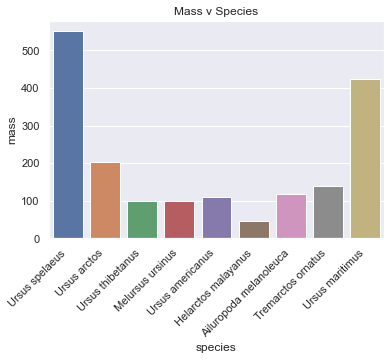

In [54]:
barplot_B = sns.barplot(x = 'species', y= 'mass', data = bears_df) # Setting plot data
barplot_B.set_xticklabels(labels = bears_df.species, rotation= 45, horizontalalignment='right')# Setting allignment and labels
barplot_B.set_title('Mass v Species') # Plot title
# Q1: Ursus spelaeus is largest species 
# Q2: Its common name is cave bear and has been extinct for 24,000 years # Source -> https://en.wikipedia.org/wiki/Cave_bear

 9 ##

C:\Users\Sean McLaughlin\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


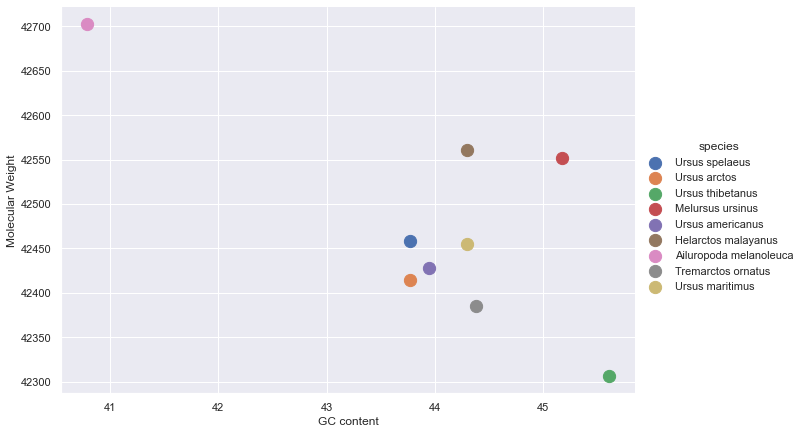

In [40]:
sns.set(font_scale=1)
plot2 = sns.lmplot(x = 'GC', y = 'molecular_weight', data= bears_df, fit_reg=False, size=6, aspect = 1.5, scatter_kws={'alpha':1,"s": 150},hue='species',markers='o')
plot2.set_axis_labels('GC content', 'Molecular Weight')

 10 ##

In [41]:
bears_df.to_csv('bears_mass_cytb.csv', sep=',',index=False, encoding='utf-8', )

 11 - BONUS ##<br>
 What else can we do with this dataset in Python? <br>
Using python we could look at various aspects of the nucleotide code such as ploting GC content with a calculated melting temperature<br>
Ordering our sequences based on GC content with species<br>
Running comparisons between our datasets such as mass and molecular weight<br>
Listing out all stop codons in a sequence -> Code example at https://stackoverflow.com/questions/34009041/python-code-to-find-coding-dna-with-start-and-stop-codons

 Add functions or anything that might be interesting and fun. (optional)